**Data Science & Business Analytics**

TASK 1

**PREDICTION USING SUPERVISED ML**

Author : Vishal Simanchal Bhunya

Prediction Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

**Reading the DataSet**

In [3]:
#Importing the dataset
db = pd.read_csv('http://bit.ly/w-data')

In [4]:
#Reading 10 records
db.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Viewing the Data**

In [5]:
db.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
db.shape

(25, 2)

In [8]:
# Check if there any null value in the Dataset
if db.isnull == True:
    print("Dataset has null values")
else:
    print("Dataset has no null values")

Dataset has no null values


**Visualization**

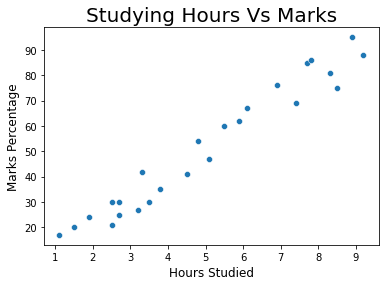

In [9]:
sns.scatterplot(y= db['Scores'], x= db['Hours'])
plt.title('Studying Hours Vs Marks',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Plotting data on Regression Plot**

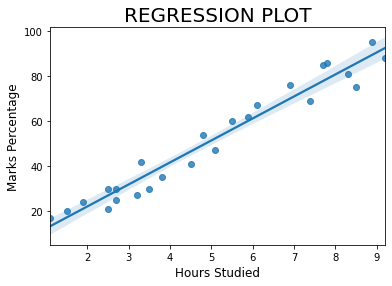

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
sns.regplot(x= db['Hours'], y= db['Scores'])
plt.title('REGRESSION PLOT',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(db.corr())

Train Test Split

In [14]:
X = db.iloc[:, :-1].values  
y = db.iloc[:, 1].values

# Spliting the data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Fitting the data into our model

In [15]:
#Using linear regression
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Our Model is Trained successfully")

Our Model is Trained successfully


**Prediction of Marks Percentage**

In [16]:
#prediction 
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparision between Actual Marks Vs Predicted Marks

In [17]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Plotting the Comparision between Actual Marks Vs Predicted Marks

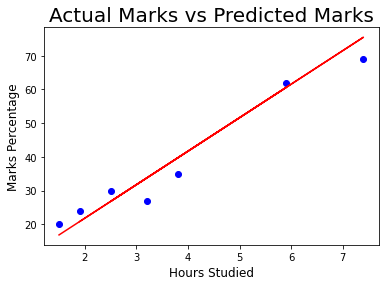

In [18]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Red')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


**Evaluation of Model**

In [19]:
# Calculating the accuracy of the model i.e. printing mean absolute error 
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Q) What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
#test by changing no. of hrs to get predicted marks
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


Result: If a student studies for 9.25 hr/day, then the predicted score is 93.893